<a href="https://colab.research.google.com/github/sakethakella/data-analytics/blob/main/Data_Detectives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df=pd.read_csv('dataset.csv')

**1.1 Data Inspection**

In [ ]:
# 1. Inspect the dataset and determine the data types of all features (numerical, categorical)
print("\nData types of each column are as follows.")
print(df.info())  # Displays the data types of each column

# 2. Calculate and analyse basic statistics for each numerical feature, including range,
# mean, median, standard deviation, and quartiles.
print("\nSummary statistics for each numerical feature are as follows.")
print(df.describe())  # Summary statistics like range, mean, median, standard deviation, quartiles

# 3. Identify features that have missing values
print("\nFeatures with missing values are as follows.")
print(df.isnull().sum())  # Check for missing values in each feature

# 4. Identify numerical and categorical features of the dataset to use for further analysis.
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns
print("\nThe numerical features' columns are as follows.")
print(numerical_cols.tolist())
print("\nThe categorical features' columns are as follows.")
print(categorical_cols.tolist())

# 5. Use imputation to fill the null values in the dataset.
# Numerical
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
# Categorical
for col in categorical_cols:
    if df[col].notnull().any():  # Check if there are any non-null values
        df[col] = df[col].fillna(df[col].mode().iloc[0])  # Fill with mode


Data types of each column are as follows.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          4534 non-null   int64  
 1   Epoch Date Close Approach     3280 non-null   float64
 2   Relative Velocity km per sec  3184 non-null   object 
 3   Relative Velocity km per hr   3033 non-null   float64
 4   Miles per hour                3668 non-null   float64
 5   Miss Dist.(Astronomical)      3933 non-null   float64
 6   Miss Dist.(lunar)             3417 non-null   float64
 7   Miss Dist.(kilometers)        3166 non-null   float64
 8   Miss Dist.(miles)             3882 non-null   float64
 9   Jupiter Tisserand Invariant   2802 non-null   float64
 10  Epoch Osculation              3007 non-null   float64
 11  Semi Major Axis               3346 non-null   float64
 12  Asc Node Longitude 

**1.2 Statistical Inference**

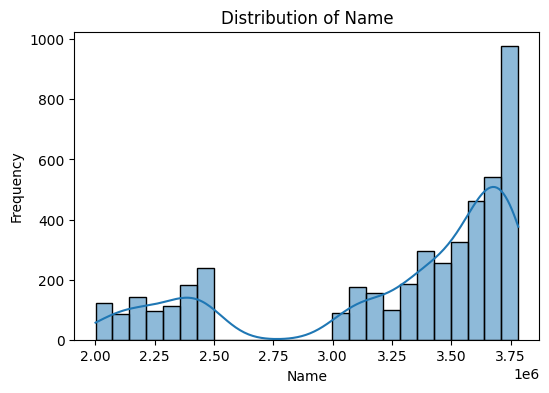

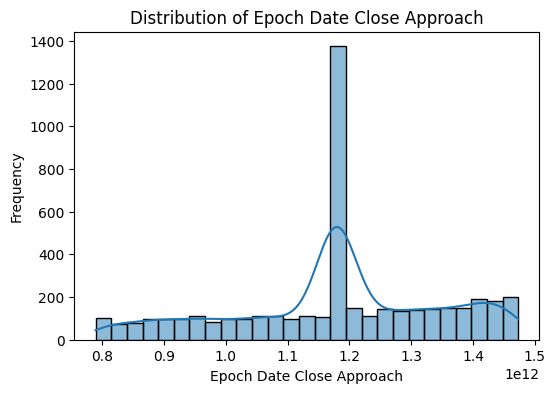

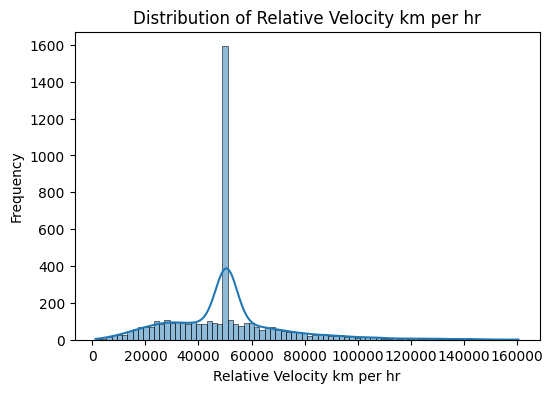

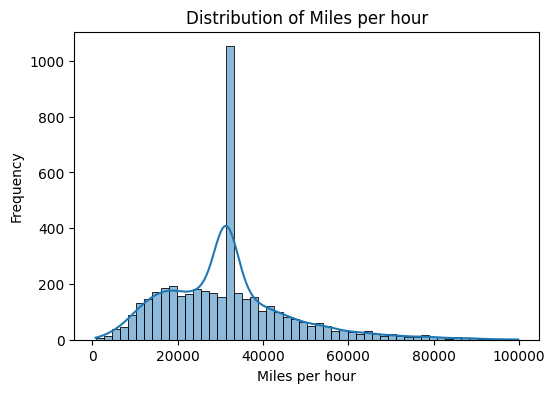

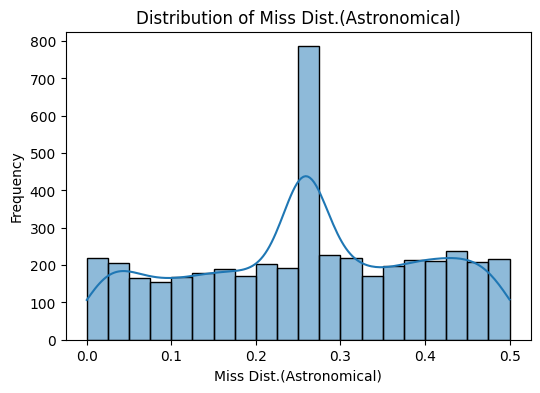

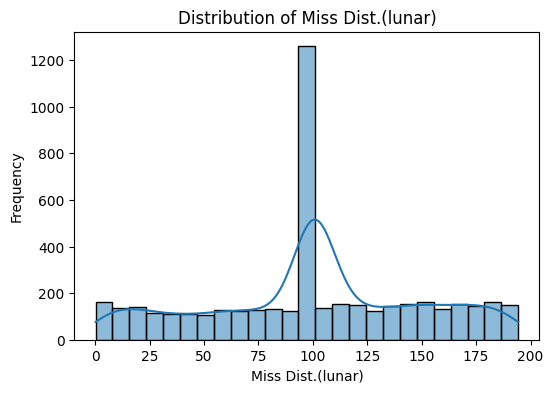

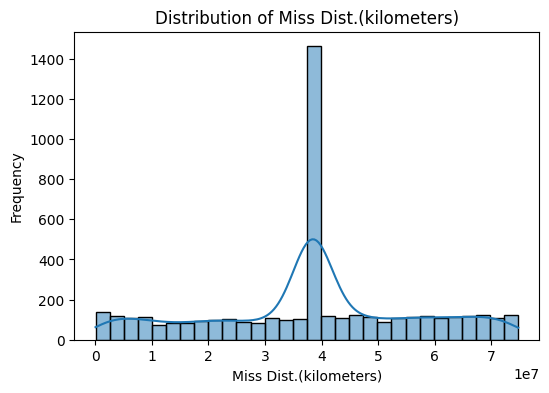

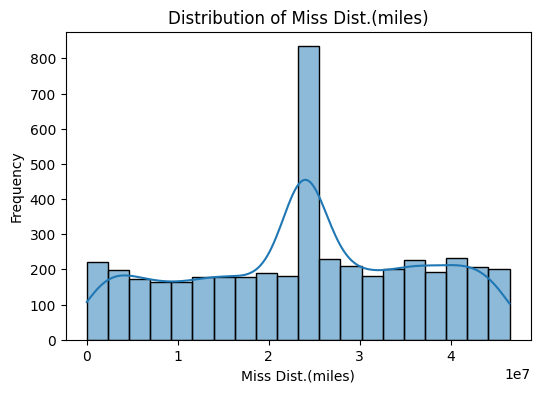

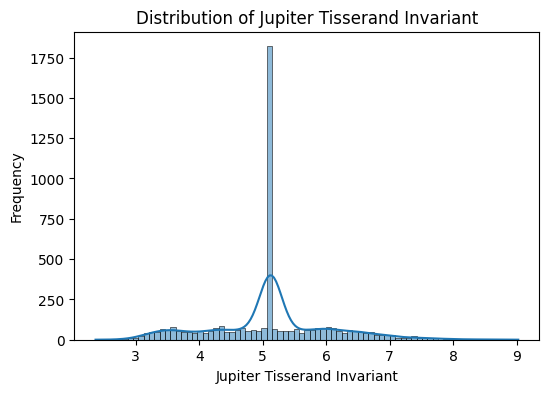

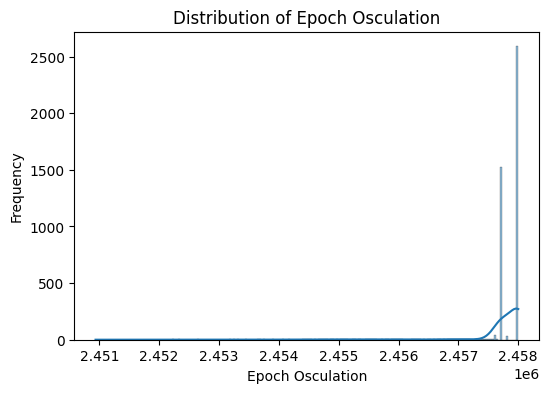

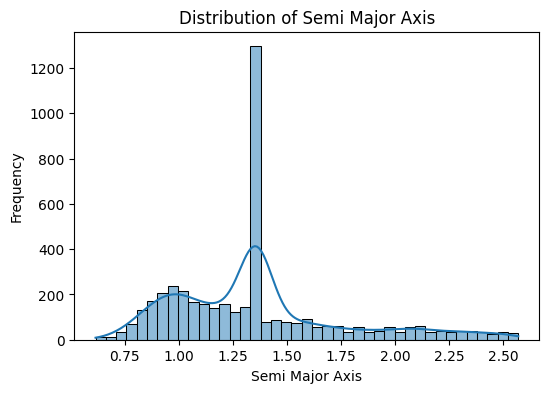

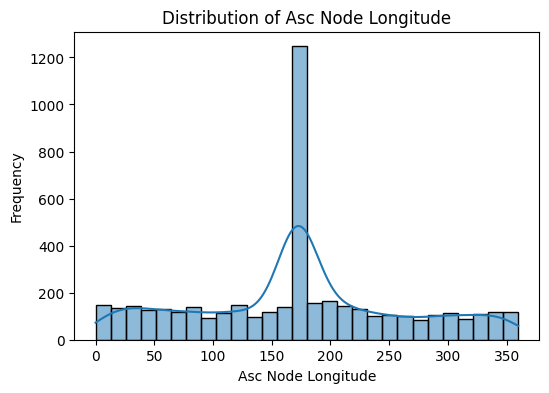

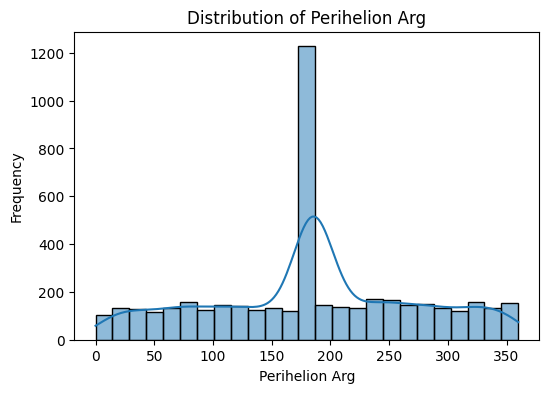

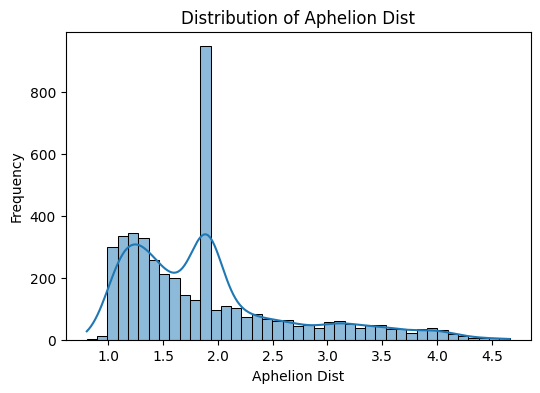

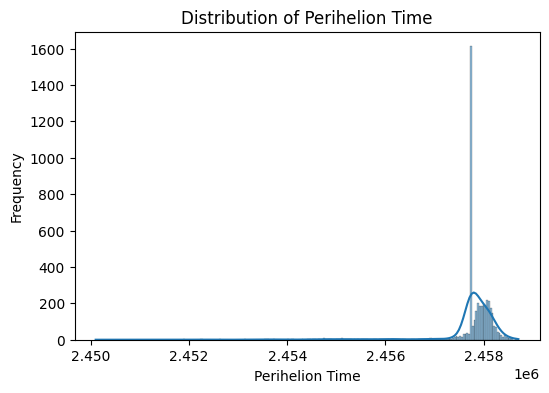

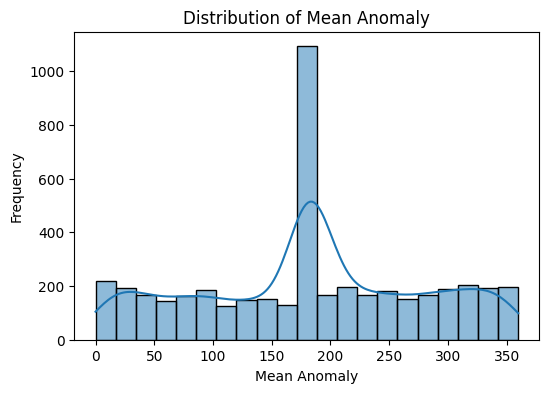

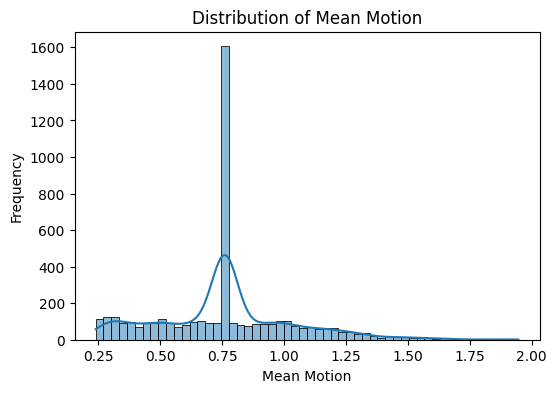

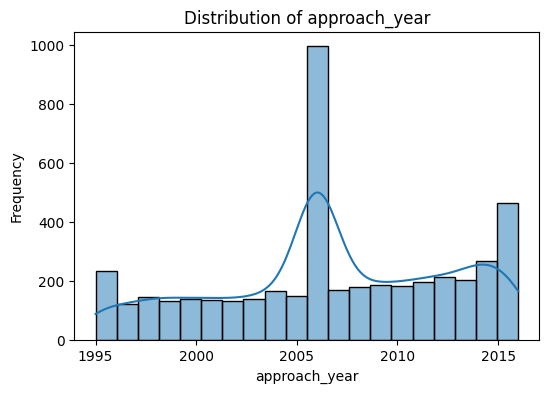

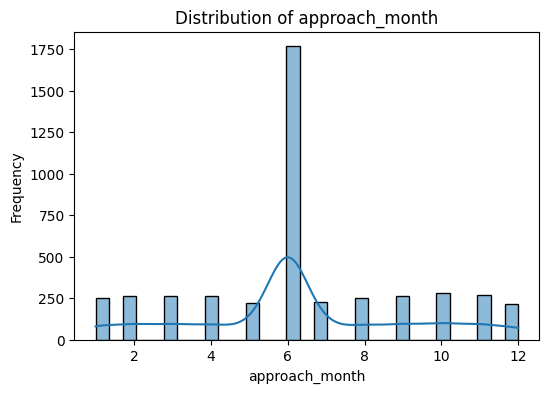

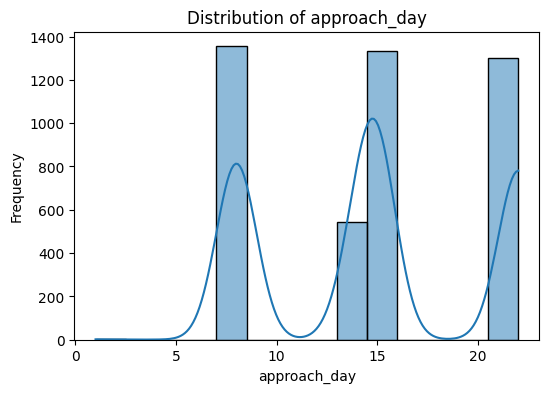

Skewness of numerical columns:
Name                          -1.083882
Epoch Date Close Approach     -0.339152
Relative Velocity km per hr    1.116830
Miles per hour                 1.028089
Miss Dist.(Astronomical)      -0.108369
Miss Dist.(lunar)             -0.136585
Miss Dist.(kilometers)        -0.119503
Miss Dist.(miles)             -0.111323
Jupiter Tisserand Invariant    0.227959
Epoch Osculation              -4.922416
Semi Major Axis                0.997503
Asc Node Longitude             0.093617
Perihelion Arg                -0.063433
Aphelion Dist                  1.255835
Perihelion Time               -4.739131
Mean Anomaly                  -0.075147
Mean Motion                    0.505621
approach_year                 -0.232648
approach_month                 0.148211
approach_day                   0.082419
dtype: float64
Highly Skewed Columns: Index(['Name', 'Relative Velocity km per hr', 'Miles per hour',
       'Epoch Osculation', 'Aphelion Dist', 'Perihelion Time'],
   

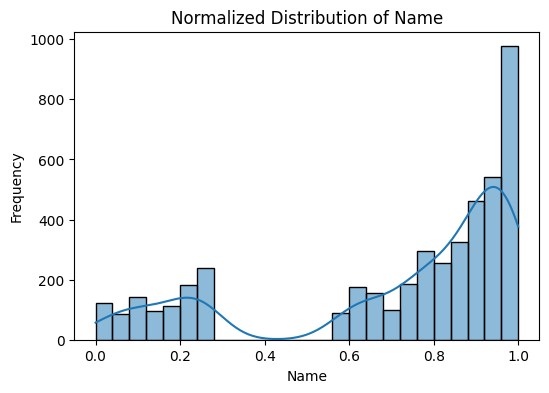

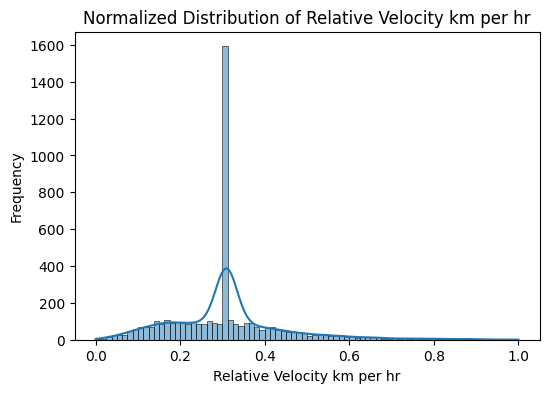

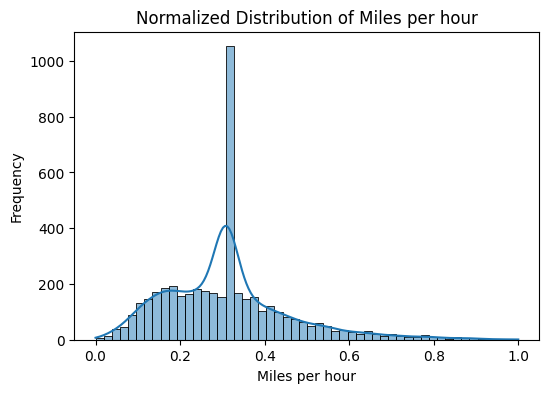

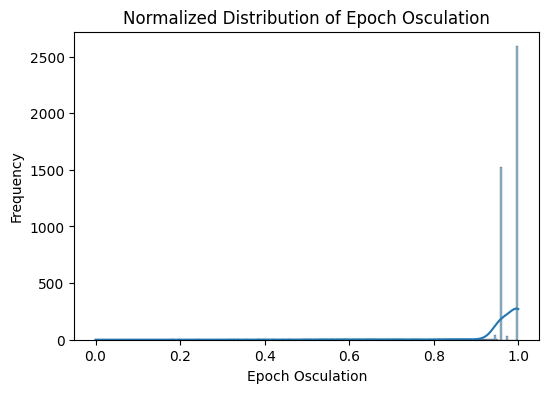

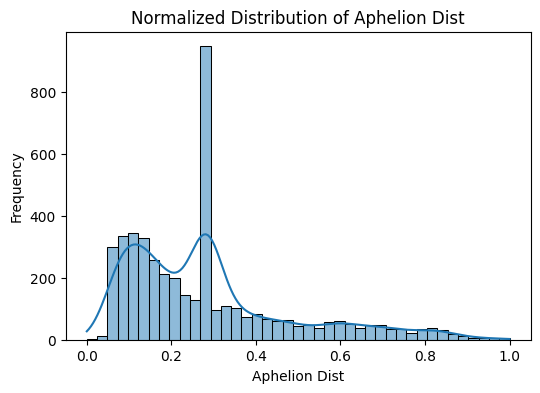

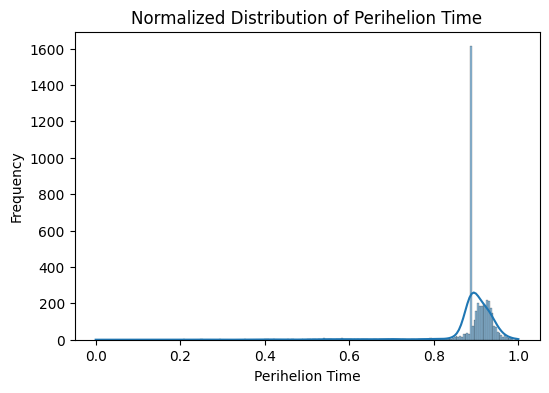

Outliers based on Z-score:
          Name  Epoch Date Close Approach Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles)  Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day Orbital Period Orbit Uncertainity  Hazardous       date  miss_distance_ratio  time_until_approach  eccentricity  Average Orbital velocity  orbital period  heliocentric_distance  escape_velocity  specific_orbital_energy  specific_angular_momentum           V_p           V_a  synodic_period
14    0.811671               7.922304e+11                         Slow                     0.886487        0.886487                  0.300963         117.074661            4.502344e+07       2.797627e+07                     5.126265          0.960354         1.358242        

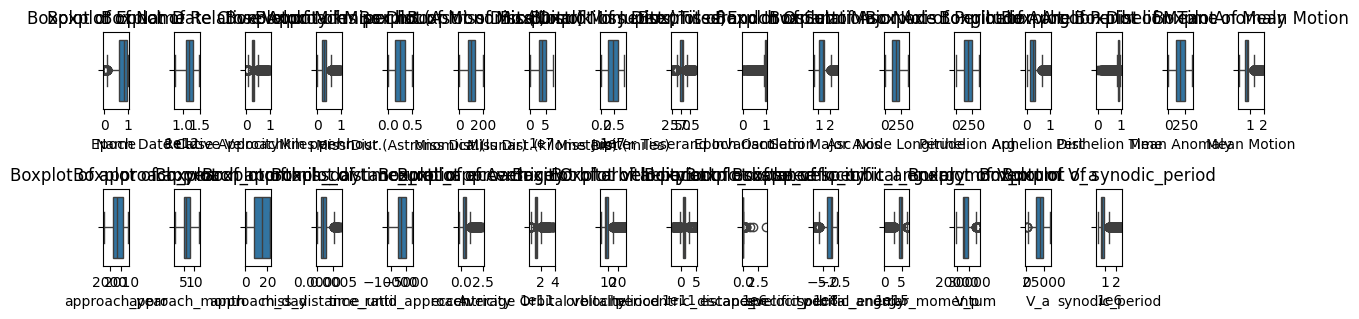

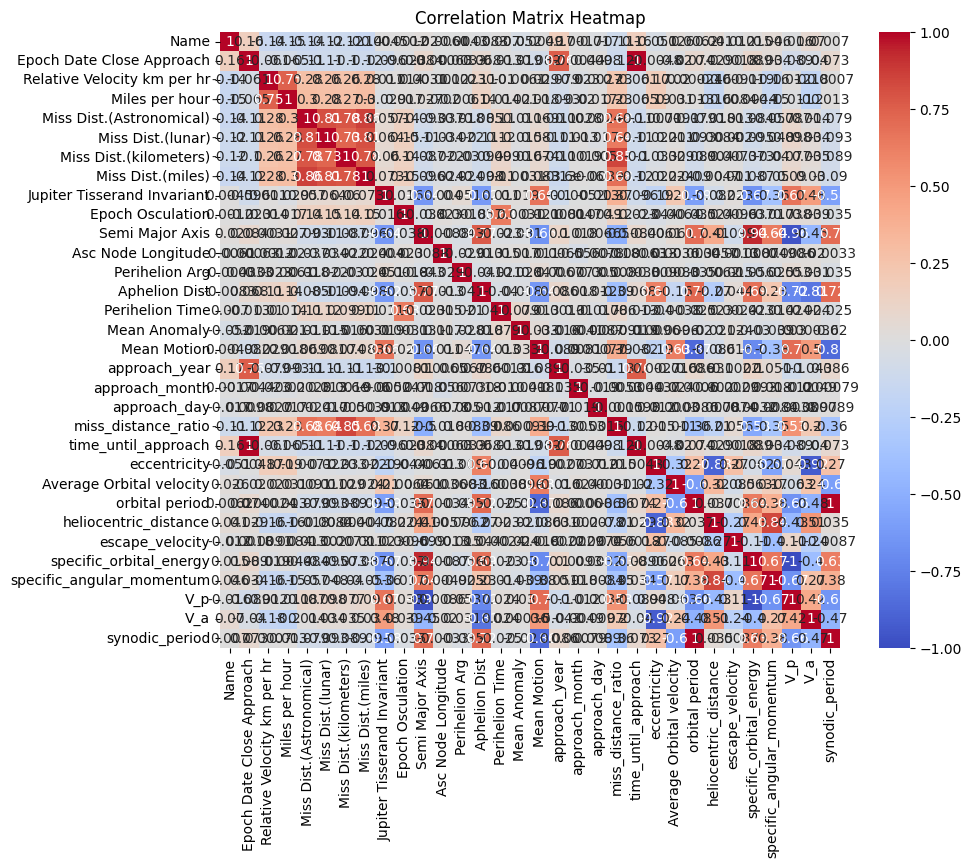

In [ ]:
# Plot the distribution of numerical features to assess the skewness of the data. Does this
# dataset require normalisation? If yes, normalise/scale the dataset.
# Plotting histograms for each numerical columns.
dt=df
for i in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(dt[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

skewness = dt[numerical_cols].skew() # Calculating skewness of the numerical columns.
print("Skewness of numerical columns:")
print(skewness)

# Checking the columns who's(absolute skewness > 1)
highly_skewed_cols = skewness[abs(skewness) > 1].index
print("Highly Skewed Columns:", highly_skewed_cols)


# Applying Min-Max Normalization (for highly skewed columns)
if len(highly_skewed_cols) > 0:
    scale = MinMaxScaler()
    dt[highly_skewed_cols] = scale.fit_transform(dt[highly_skewed_cols])

    # Displays plot of distribution after normalization
    for col in highly_skewed_cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(dt[col], kde=True)
        plt.title(f'Normalized Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# 2. Identify potential outliers in the numerical columns using any statistical technique
# (e.g., box plots, z-score, etc.).
numerical_columns = dt.select_dtypes(include=[np.number])
z_scores = np.abs(stats.zscore(numerical_columns)) # calculating z-score.

# Set a threshold for Z-score (taking 3).
threshold = 3
outliers = (z_scores > threshold)

# Printing outliers.
print(f"Outliers based on Z-score:\n{dt[outliers.any(axis=1)].to_string()}")

# Plot boxplots for each numerical column.
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, len(numerical_columns.columns) // 2 + 1, i)
    sns.boxplot(x=numerical_columns[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 3. Explore the relationship between different features using scatter plots or correlation matrices.
# Correlation matrix
corr_matrix = numerical_columns.corr()
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

**1.3 Visualisation**

In [ ]:
# 1. Create a pairplot using Seaborn to visualise relationships between multiple numerical features simultaneously.
#creating a pairplot -->
plt.figure(figsize=(10, 8))
sns.pairplot(numerical_columns)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


NameError: name 'plt' is not defined

**1.4 Tackling Class Imbalance**


Analyzing class distribution for 'Relative Velocity km per sec'
Class distribution:
 Relative Velocity km per sec
Slow         2805
Very Slow    1319
Fast          353
Very Fast      57
Name: count, dtype: int64


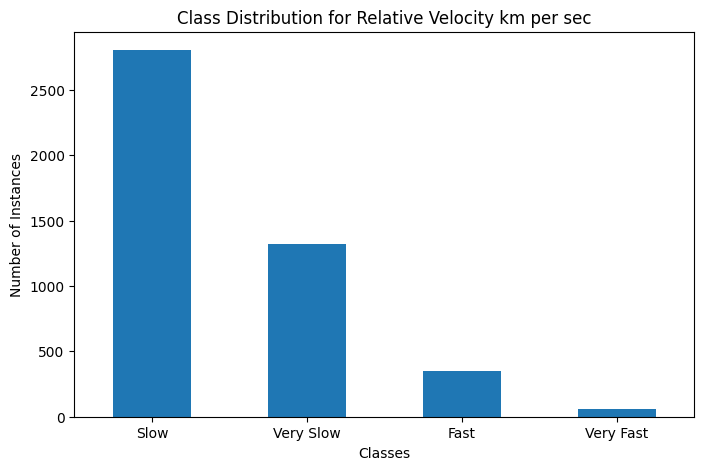

Class imbalance detected.
New class distribution after upsampling:
 Relative Velocity km per sec
Slow         2805
Very Fast    2805
Name: count, dtype: int64

Analyzing class distribution for 'Orbital Period'
Class distribution:
 Orbital Period
Low       3135
Medium     917
High       482
Name: count, dtype: int64


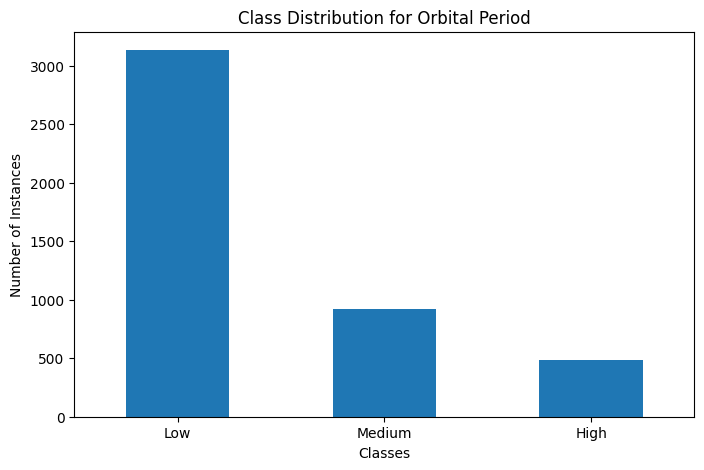

No significant class imbalance detected for this target.

Analyzing class distribution for 'Orbit Uncertainity'
Class distribution:
 Orbit Uncertainity
Low       3214
High       671
Medium     649
Name: count, dtype: int64


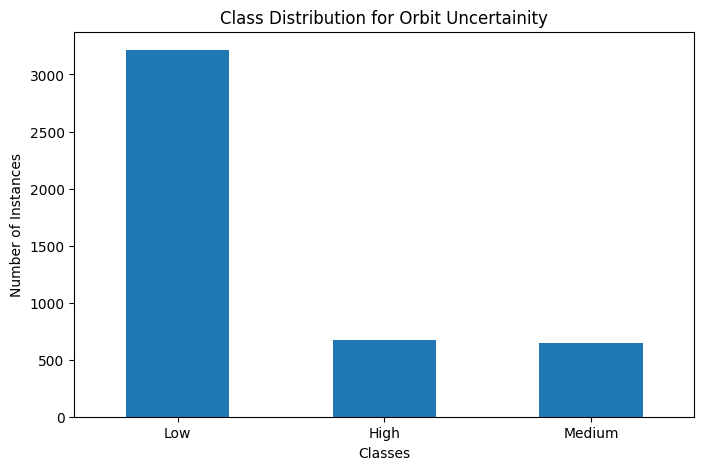

No significant class imbalance detected for this target.

Analyzing class distribution for 'Hazardous'
Class distribution:
 Hazardous
False    3798
True      736
Name: count, dtype: int64


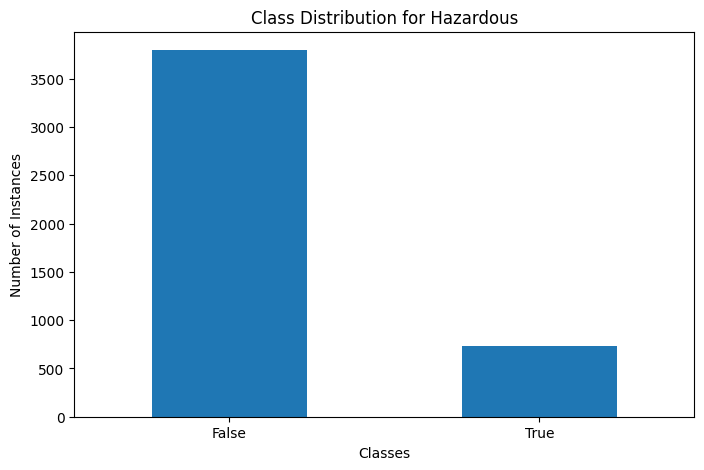

No significant class imbalance detected for this target.


In [ ]:
# 1. Is there a classification bias (class imbalance) in this dataset? If yes, how would you tackle it?
# checking class imbalance -->

for i in categorical_cols:
    print(f"\nAnalyzing class distribution for '{i}'")

    # Check class distribution
    class_counts = dt[i].value_counts()
    print("Class distribution:\n", class_counts)

    # Visualize class distribution
    plt.figure(figsize=(8, 5))
    class_counts.plot(kind='bar')
    plt.title(f'Class Distribution for {i}')
    plt.xlabel('Classes')
    plt.ylabel('Number of Instances')
    plt.xticks(rotation=0)
    plt.show()

    # Determine if there's a class imbalance
    threshold = 0.1  # Set a threshold for imbalance (e.g., one class has <10% of instances)
    total_instances = len(dt)
    imbalance_detected = any((count / total_instances < threshold) for count in class_counts)

    if imbalance_detected:
        print("Class imbalance detected.")

        # Tackle class imbalance using resampling techniques
        # Separate majority and minority classes
        majority_class = class_counts.idxmax()
        minority_class = class_counts.idxmin()

        # Up-sampling minority class
        dt_minority = dt[dt[i] == minority_class]
        dt_majority = dt[dt[i] == majority_class]

        dt_minority_upsampled = resample(dt_minority,
                                          replace=True,         # sample with replacement
                                          n_samples=len(dt_majority),  # to match majority class
                                          random_state=123)  # reproducible results

        # Combine majority class with upsampled minority class
        dt_upsampled = pd.concat([dt_majority, dt_minority_upsampled])

        # Display the new class distribution
        new_class_counts = dt_upsampled[i].value_counts()
        print("New class distribution after upsampling:\n", new_class_counts)
    else:
        print("No significant class imbalance detected for this target.")


### **2. Numerical Interpretation and Mathematical Analysis**

**2.1 Feature Engineering**

In [ ]:
G = 6.67430e-11
M_sun = 1.989e30
a = df['Semi Major Axis'] * 1.496e11

#1. Combine the approach_date, month, and year features into a single feature representing
#the day of the year. Convert it into a ‘datetime’ format.
df['approach_day'] = df['approach_day'].astype(int)
df['approach_month'] = df['approach_month'].astype(int)
df['approach_year'] = df['approach_year'].astype(int)
df['date']=pd.to_datetime(dict(year=df['approach_year'], month=df['approach_month'], day=df['approach_day']))



#2. Calculate the ratio of Miss Distance vs. Semi-major axis. Create a 'Time Until Approach' feature
#based on the difference between the'Epoch Date Close Approach' and the current date.
df['miss_distance_ratio'] = df['Miss Dist.(kilometers)'] / a

from datetime import datetime
g = pd.to_datetime(df['Epoch Date Close Approach'], unit='ms')
current_date = datetime.now()
df['time_until_approach'] = (g - current_date).dt.days


#3. Calculate the eccentricity of the orbit, average orbital velocity, and orbital period using Kepler’s Law.
df['eccentricity'] = (df['Aphelion Dist'] - df['Semi Major Axis']) / df['Semi Major Axis']
df['Average Orbital velocity']=a*df['Mean Motion']
df['orbital period']=(2*3.14)/df['Mean Motion']

#4. Calculate the heliocentric distance, escape velocity, and specific orbital energy.
e = df['eccentricity']
heliocentric_distance = a * (1 - e)
escape_velocity = np.sqrt(2 * G * M_sun / heliocentric_distance)
specific_orbital_energy = -G * M_sun / (2 * a)
df['heliocentric_distance'] = heliocentric_distance
df['escape_velocity'] = escape_velocity
df['specific_orbital_energy'] = specific_orbital_energy


#5. Calculate the Specific Angular Momentum using the formula: h=sqrt(GMa(1−e2)).
specific_angular_momentum = np.sqrt(G * M_sun * a * (1 - e**2))
df['specific_angular_momentum'] = specific_angular_momentum

#6. Calculate the velocity at Perihelion and Aphelion.
v_p= np.sqrt(G * M_sun * ((1 - e) / (a * (1 - e))))
v_a= np.sqrt(G * M_sun * ((1 - e) / (a * (1 + e))))
df['V_p']=v_p
df['V_a']=v_a

#7. Average the Miss distance of various categories and find the closest approach distance.
average_miss_distance = df['Miss Dist.(kilometers)'].mean()
closest_approach_distance = df['Miss Dist.(kilometers)'].min()

#8. Calculate Synodic Period and Mean Motion using the orbital period.
T_earth = 365.25 * 24 * 3600
T = df['orbital period']*24 * 3600
synodic_period = np.abs(1 / ((1 / T) - (1 / T_earth)))
df['synodic_period'] = synodic_period
print(df)

          Name  Epoch Date Close Approach Relative Velocity km per sec  \
0     0.955757               7.889472e+11                    Very Slow   
1     0.967475               1.178921e+12                         Slow   
2     0.250597               7.895520e+11                         Slow   
3     0.613020               7.901568e+11                    Very Slow   
4     0.850068               7.901568e+11                    Very Slow   
...        ...                        ...                          ...   
4529  0.987151               1.473318e+12                         Slow   
4530  0.987313               1.178921e+12                    Very Slow   
4531  0.987548               1.473318e+12                    Very Slow   
4532  0.987551               1.178921e+12                         Slow   
4533  0.994993               1.473318e+12                    Very Fast   

      Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  \
0                        0.13048

**2.2 Additional Features**

In [ ]:
# 1. Risk Assessment Index
# Normalize the features (min-max scaling) for calculating "Risk Assessment Index"
df['Normalized_Velocity'] = (df['Relative Velocity km per hr'] - df['Relative Velocity km per hr'].min()) / (df['Relative Velocity km per hr'].max() - df['Relative Velocity km per hr'].min())
df['Normalized_Miss_Distance'] = (df['Miss Dist.(kilometers)'].max() - df['Miss Dist.(kilometers)']) / (df['Miss Dist.(kilometers)'].max() - df['Miss Dist.(kilometers)'].min())  # Lower distance is riskier
df['Normalized_Eccentricity'] = (df['eccentricity'] - df['eccentricity'].min()) / (df['eccentricity'].max() - df['eccentricity'].min())

# Assign weights to each feature
weights = {
    'Relative Velocity km per hr': 0.4,
    'Miss Dist.(kilometers)': 0.4,
    'eccentricity': 0.2
}

# Calculate the Risk Assessment Index
df['Risk_Assessment_Index'] = (
    weights['Relative Velocity km per hr'] * df['Normalized_Velocity'] +
    weights['Miss Dist.(kilometers)'] * df['Normalized_Miss_Distance'] +
    weights['eccentricity'] * df['Normalized_Eccentricity']
)

# Display the DataFrame with RAI
print(df[['Relative Velocity km per hr', 'Miss Dist.(kilometers)', 'eccentricity', 'Risk_Assessment_Index']])

# 2. Orbital Inclination (degrees)
#It indicates the tilt of the asteroid's orbit relative to the solar system's plane.
#A higher inclination can suggest a more eccentric orbit, i.e. more unstable orbit.
df['Asc_Node_Longitude_rad'] = np.radians(df['Asc Node Longitude'])
df['Perihelion_Argument_rad'] = np.radians(df['Perihelion Arg'])
df['Mean_Anomaly_rad'] = np.radians(df['Mean Anomaly'])

# Calculate the inclination (this is a simplified estimate)
df['Inclination'] = np.degrees(np.arctan2(np.sin(df['Asc_Node_Longitude_rad']),
                                           np.cos(df['Asc_Node_Longitude_rad']) * np.sin(df['Perihelion_Argument_rad'])))
# Ensure inclination is within 0-180 degrees
df['Inclination'] = np.abs(df['Inclination']) % 180

# Display the DataFrame with Inclination
print(df[['Asc Node Longitude', 'Perihelion Arg', 'Mean Anomaly', 'Inclination']])


# 3. Orbital Stability Index
# Normalize the features (min-max scaling)
df['Normalized_Inclination'] = (df['Inclination'] - df['Inclination'].min()) / (df['Inclination'].max() - df['Inclination'].min())
df['Normalized_Semi_Major_Axis'] = (df['Semi Major Axis'] - df['Semi Major Axis'].min()) / (df['Semi Major Axis'].max() - df['Semi Major Axis'].min())

# Assign weights
weights = {
    'eccentricity': 0.4,
    'Inclination': 0.3,
    'Semi Major Axis': 0.3
}

# Calculate the Orbital Stability Index
df['Orbital_Stability_Index'] = (
    weights['eccentricity'] * (1 - df['Normalized_Eccentricity']) +  # Lower eccentricity is more stable
    weights['Inclination'] * (1 - df['Normalized_Inclination']) +    # Lower inclination is more stable
    weights['Semi Major Axis'] * df['Normalized_Semi_Major_Axis']   # Higher semi-major axis can be more stable
)

# Display the DataFrame with OSI
print(df[['eccentricity', 'Inclination', 'Semi Major Axis', 'Orbital_Stability_Index']])


      Relative Velocity km per hr  Miss Dist.(kilometers)  eccentricity  \
0                        0.130487            6.275369e+07     -0.778589   
1                        0.401336            5.729815e+07     -0.837728   
2                        0.163781            7.622912e+06     -0.793365   
3                        0.244668            3.842441e+07     -0.861822   
4                        0.214576            6.101082e+07     -0.768583   
...                           ...                     ...           ...   
4529                     0.492542            6.187511e+06     -0.826492   
4530                     0.065232            9.677324e+05     -0.791180   
4531                     0.154772            9.126775e+06     -0.781746   
4532                     0.309199            3.900908e+07     -0.812243   
4533                     0.803900            6.916986e+07     -0.807585   

      Risk_Assessment_Index  
0                  0.176700  
1                  0.298166  
2        

## **3. Handling Binned Values**

In [ ]:
#Modify the binned features that have an ordinal relationship
df['Hazardous']=df['Hazardous'].astype(int)
ordinal=categorical_cols.tolist()
df[ordinal[0]]=df[ordinal[0]].replace({'Very Slow':0,'Slow':1,'Fast':2,'Very Fast':3},inplace=False)
df[ordinal[1]]=df[ordinal[1]].replace({'Low':0,'Medium':1,'High':2},inplace=False)
df[ordinal[2]]=df[ordinal[2]].replace({'Very Low':0,'Low':1,'Medium':2,'High':3,'Very High':4},inplace=False)

# #One-hot encode the binned features whose relationship is not strictly ordinal.
# # Function to identify strictly non-ordinal binned features
# def identify_non_ordinal_features(df):
#     non_ordinal_features = []

#     for column in df.select_dtypes(include=['object', 'bool', 'category']).columns:
#         unique_values = df[column].unique()
#         if len(unique_values) > 3: # Check if there are more than 3 unique values.
#           non_ordinal_features.append(column)
#     return non_ordinal_features

# # Identify non-ordinal features
# non_ordinal_features = identify_non_ordinal_features(df)

# # Display identified non-ordinal features
# print("Strictly Non-Ordinal Binned Features:")
# print(non_ordinal_features)

# # One-hot encode the identified non-ordinal features
# df_one_hot_encoded = pd.get_dummies(df, columns=non_ordinal_features, drop_first=True)

# # Display the DataFrame after one-hot encoding
# print("\nDataFrame After One-Hot Encoding:")
# print(df_one_hot_encoded)


NameError: name 'df' is not defined

**4. Hazardous Classification**

K=2, Avg Accuracy=0.8342985336212616
K=3, Avg Accuracy=0.8337468982630273
K=4, Avg Accuracy=0.8367775408826614
K=5, Avg Accuracy=0.8392571482853614
K=6, Avg Accuracy=0.8387097951215953
K=7, Avg Accuracy=0.8387119572090672
K=8, Avg Accuracy=0.8398051171339382
K=9, Avg Accuracy=0.8367797077474497
K=10, Avg Accuracy=0.8387120831621082


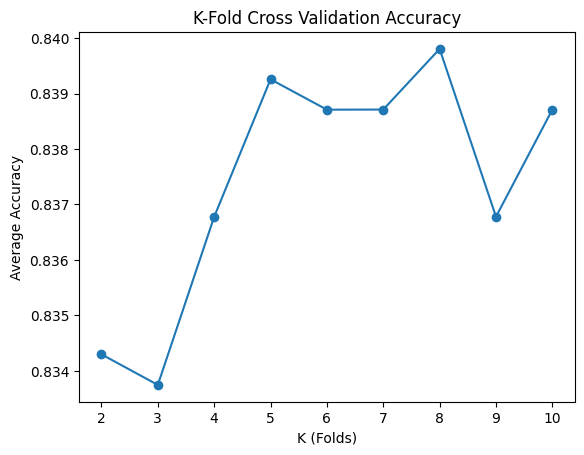

Best Parameters:  {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Confusion Matrix:
 [[764   4]
 [131   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       768
           1       0.67      0.06      0.11       139

    accuracy                           0.85       907
   macro avg       0.76      0.53      0.51       907
weighted avg       0.82      0.85      0.79       907



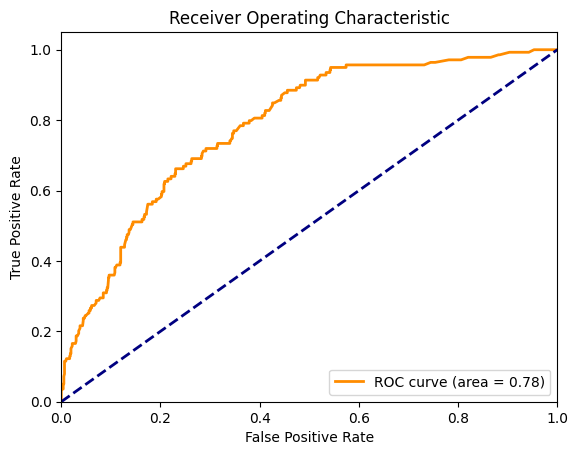

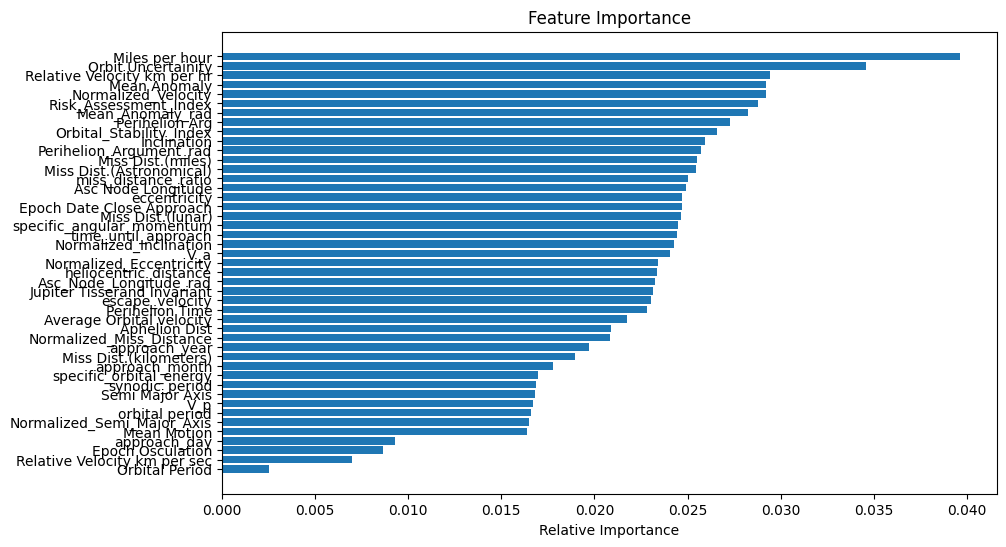

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# 1. Data Preprocessing
# Assume 'Hazardous' is the target column, and drop any irrelevant columns
X = df.drop(['Hazardous','Name','date'], axis=1)
y = df['Hazardous']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace infinite values with NaN in X_test
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values (e.g., with the mean)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# 2. Build Classifier: Random Forest
clf = RandomForestClassifier(random_state=42)

# 3. K-Fold Cross Validation for K values from 2 to 10
kf_results = {}

for k in range(2, 11):
    kf = KFold(n_splits=k)
    accuracy_scores = []

    for train_index, val_index in kf.split(X_train):
        X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

        clf.fit(X_train_kf, y_train_kf)
        predictions = clf.predict(X_val_kf)
        accuracy_scores.append(accuracy_score(y_val_kf, predictions))

    avg_accuracy = np.mean(accuracy_scores)
    kf_results[k] = avg_accuracy
    print(f"K={k}, Avg Accuracy={avg_accuracy}")

# 4. Plot accuracy vs. K values
plt.plot(list(kf_results.keys()), list(kf_results.values()), marker='o')
plt.xlabel('K (Folds)')
plt.ylabel('Average Accuracy')
plt.title('K-Fold Cross Validation Accuracy')
plt.show()

# 5. Hyperparameter Optimization using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

# Train the model with optimized hyperparameters
best_clf = grid_search.best_estimator_

# 6. Model Evaluation: ROC Curve and Confusion Matrix
y_pred = best_clf.predict(X_test)
y_prob = best_clf.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



importances = best_clf.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### **5. Anomaly Detection**

<ipython-input-38-d0c521998c96>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['anomaly_iso'].fillna(0, inplace=True) #This line should now work correctly
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Anomalies detected by Isolation Forest: 0
Anomalies detected by Z-Score method: 535
Confusion Matrix:
 [[3999  535]
 [   0    0]]
Number of examples flagged by both algorithms: 0


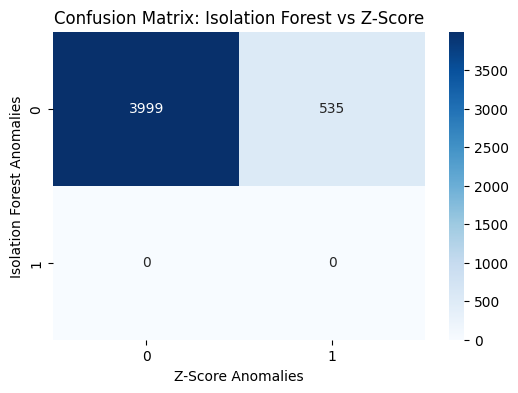

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer


numerical_features = df.select_dtypes(include=[np.number]).columns
# Instead of creating a separate DataFrame, use a copy of the original to avoid index issues
df_numerical = df.copy()
df_numerical = df_numerical[numerical_features].dropna()  # Drop rows with NaN

# Replace infinite values with NaN
df_numerical.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values (e.g., with the median - more robust to outliers than mean)
imputer = SimpleImputer(strategy='median')
df_numerical[:] = imputer.fit_transform(df_numerical)


iso_forest = IsolationForest(contamination=0.1, random_state=42)  # 10% contamination
df_numerical['anomaly_iso'] = iso_forest.fit_predict(df_numerical)

# In IsolationForest, -1 means anomaly, 1 means normal, so we'll adjust to 1 for anomaly, 0 for normal
df_numerical['anomaly_iso'] = df_numerical['anomaly_iso'].apply(lambda x: 1 if x == -1 else 0)

# Merge the anomaly results back to the original DataFrame, preserving all rows in df
df = df.merge(df_numerical[['anomaly_iso']], left_index=True, right_index=True, how='left')

# Fill NaN values in 'anomaly_iso' with 0 (assuming non-numerical columns are not anomalous)
df['anomaly_iso'].fillna(0, inplace=True)


# In IsolationForest, -1 means anomaly, 1 means normal, so we'll adjust to 1 for anomaly, 0 for normal
df['anomaly_iso'] = df['anomaly_iso'].apply(lambda x: 1 if x == -1 else 0)

# Print the number of anomalies detected by Isolation Forest
print(f"Anomalies detected by Isolation Forest: {df['anomaly_iso'].sum()}")

# 2. Writing Custom Anomaly Detection Algorithm (Z-Score Method)
# We'll use the Z-score method to detect outliers based on a threshold.
from scipy import stats

# Calculate Z-scores for all numerical features
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Set a threshold for detecting outliers (commonly 3 standard deviations from the mean)
threshold = 3
df['anomaly_zscore'] = (z_scores > threshold).any(axis=1).astype(int)

# Print the number of anomalies detected by Z-Score method
print(f"Anomalies detected by Z-Score method: {df['anomaly_zscore'].sum()}")

# 3. Store the results as new columns and compare with confusion matrix
# Create a confusion matrix comparing the results of the two methods
conf_matrix = confusion_matrix(df['anomaly_iso'], df['anomaly_zscore'])

print("Confusion Matrix:\n", conf_matrix)

# Number of examples flagged by both algorithms
anomalies_both = (df['anomaly_iso'] & df['anomaly_zscore']).sum()
print(f"Number of examples flagged by both algorithms: {anomalies_both}")

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Z-Score Anomalies')
plt.ylabel('Isolation Forest Anomalies')
plt.title('Confusion Matrix: Isolation Forest vs Z-Score')
plt.show()